In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")


In [7]:
df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029.0,280.0,577.0
1,01-03-2025,Bihar,Madhepura,852121.0,144.0,369.0
2,01-03-2025,Jammu and Kashmir,Punch,185101.0,643.0,1091.0
3,01-03-2025,Bihar,Bhojpur,802158.0,256.0,980.0
4,01-03-2025,Tamil Nadu,Madurai,625514.0,271.0,815.0


In [8]:
df.shape


(207279, 6)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 207279 entries, 0 to 212821
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          207279 non-null  object 
 1   state         207278 non-null  object 
 2   district      207278 non-null  object 
 3   pincode       207278 non-null  float64
 4   bio_age_5_17  207278 non-null  float64
 5   bio_age_17_   207278 non-null  float64
dtypes: float64(3), object(3)
memory usage: 11.1+ MB


In [10]:
df.describe()


,pincode,bio_age_5_17,bio_age_17_
count,207278.000000,207278.000000,207278.000000
mean,521896.997839,100.256433,111.159708
std,200022.411277,230.842022,242.219231
min,110001.000000,0.000000,0.000000
25%,389146.000000,3.000000,4.000000
50%,522617.000000,21.000000,25.000000
75%,690529.000000,98.000000,116.000000
max,855456.000000,8002.000000,7625.000000


In [4]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage (%)
state,1,0.00047
district,1,0.00047
pincode,1,0.00047
bio_age_5_17,1,0.00047
bio_age_17_,1,0.00047


In [5]:
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate Rows: 5543


In [14]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date column safely
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month


In [16]:
df['state'].value_counts().head()


,count
state,
Tamil Nadu,18851
Andhra Pradesh,18159
Uttar Pradesh,17821
Karnataka,16502
Maharashtra,16293


In [17]:
df['total_bio'] = df['bio_age_5_17'] + df['bio_age_17_']



In [18]:
df.groupby('state')[['bio_age_5_17','bio_age_17_']].mean()


,bio_age_5_17,bio_age_17_
state,,
Andaman & Nicobar Islands,2.452381,23.190476
Andaman and Nicobar Islands,36.150838,29.491620
Andhra Pradesh,84.018283,48.551077
Arunachal Pradesh,40.607287,43.736842
Assam,61.694715,34.857470
Bihar,163.232741,182.676264
Chandigarh,210.494949,91.318182
Chhattisgarh,91.496149,344.607227
Dadra & Nagar Haveli,3.625000,30.750000


In [19]:
df.groupby('date')['total_bio'].sum()


,total_bio
date,
2025-01-03,8322222.0
2025-01-04,8641679.0
2025-01-05,7879956.0
2025-01-06,7899289.0
2025-01-07,9792552.0
2025-01-09,317180.0
2025-02-09,301984.0
2025-03-09,308206.0
2025-04-09,272576.0


In [20]:
df['month'] = df['date'].dt.month
df.groupby('month')['total_bio'].mean()


,total_bio
month,
1.0,325.387462
2.0,14.015130
3.0,14.056004
4.0,13.649274
5.0,7.108685


In [21]:
df['adult_ratio'] = df['bio_age_17_'] / df['total_bio']


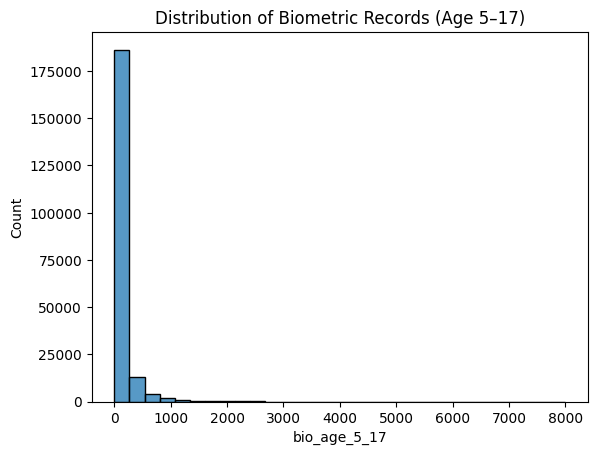

In [22]:
sns.histplot(df['bio_age_5_17'], bins=30)
plt.title("Distribution of Biometric Records (Age 5–17)")
plt.show()


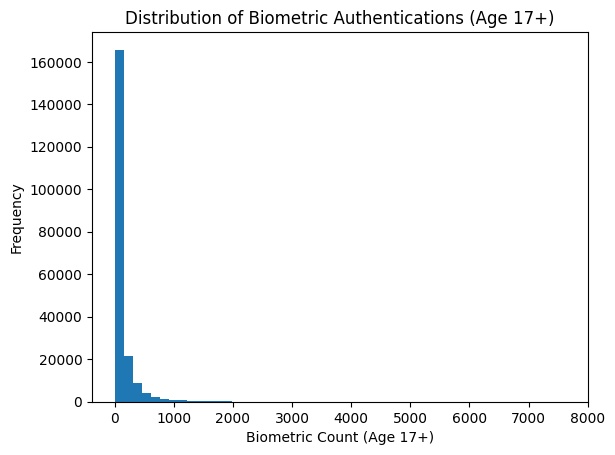

In [23]:
plt.figure()
plt.hist(df['bio_age_17_'], bins=50)
plt.xlabel("Biometric Count (Age 17+)")
plt.ylabel("Frequency")
plt.title("Distribution of Biometric Authentications (Age 17+)")
plt.show()


/tmp/ipython-input-2965395562.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['bio_age_5_17'], df['bio_age_17_']],


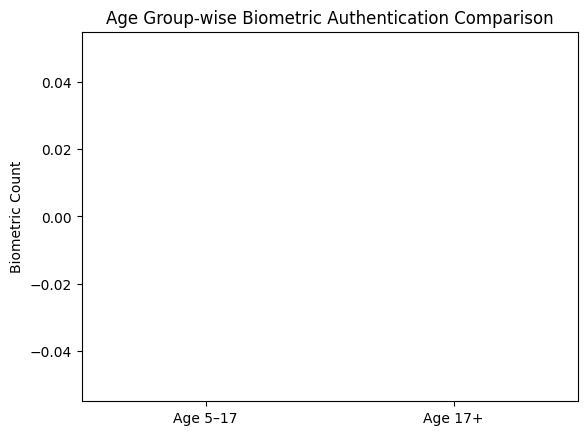

In [24]:
plt.figure()
plt.boxplot([df['bio_age_5_17'], df['bio_age_17_']],
            labels=['Age 5–17', 'Age 17+'])
plt.ylabel("Biometric Count")
plt.title("Age Group-wise Biometric Authentication Comparison")
plt.show()


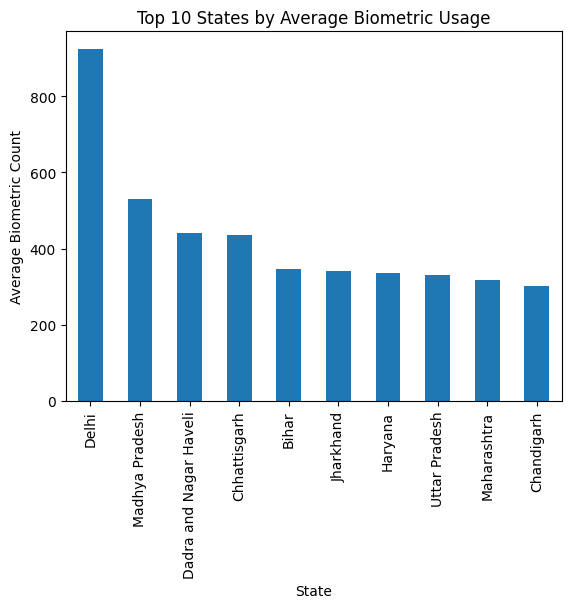

In [25]:
state_avg = df.groupby('state')['total_bio'].mean().sort_values(ascending=False).head(10)

plt.figure()
state_avg.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Average Biometric Count")
plt.title("Top 10 States by Average Biometric Usage")
plt.show()


In [26]:
!git config --global user.name "purvi1239"
!git config --global user.email "purvijain1239@gmail.com"


In [28]:
!git clone https://github.com/abhishek130904/UIDAI-Hackathon.git


Cloning into 'UIDAI-Hackathon'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32 (from 1)
Receiving objects: 100% (32/32), 74.87 MiB | 23.33 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (21/21), done.


In [29]:
%cd UIDAI-Hackathon



/content/UIDAI-Hackathon


In [34]:
!cp /content/UIDIA.ipynb /content/UIDAI-Hackathon/


cp: cannot stat '/content/UIDIA.ipynb': No such file or directory


In [35]:
!git status
!git add .
!git commit -m "o"


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [36]:
from google.colab import files
files.download('UIDIA.ipynb')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>